In [37]:
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sbn
import datetime
import altair as alt

In [61]:
serie_o = pd.read_csv("/home/jonathan/tesis/1er_avance/periodoviajes24h.csv", sep=',',index_col=0, parse_dates=True)
serie_o.shape
#serie_o.head(24)

(6264, 1)

In [66]:
serie_o['Año'] = serie_o.index.year                                
serie_o['Mes'] = serie_o.index.month                               
serie_o['Dia'] = serie_o.index.day_name()
serie_o['Hora'] = serie_o.index.hour
serie_o.sample(8, random_state=0)  

,viajes,Año,Mes,Dia,Hora
ds,,,,,
2020-04-30 07:00:00,2.485816e+06,2020,4,Thursday,7
2020-06-17 03:00:00,8.601140e+05,2020,6,Wednesday,3
2020-05-24 00:00:00,1.524526e+06,2020,5,Sunday,0
2020-03-20 03:00:00,6.645977e+05,2020,3,Friday,3
2020-05-06 09:00:00,2.668726e+06,2020,5,Wednesday,9
2020-04-14 13:00:00,3.026463e+06,2020,4,Tuesday,13
2020-07-05 08:00:00,1.879255e+06,2020,7,Sunday,8
2020-04-05 14:00:00,1.553164e+06,2020,4,Sunday,14


<AxesSubplot:xlabel='ds'>

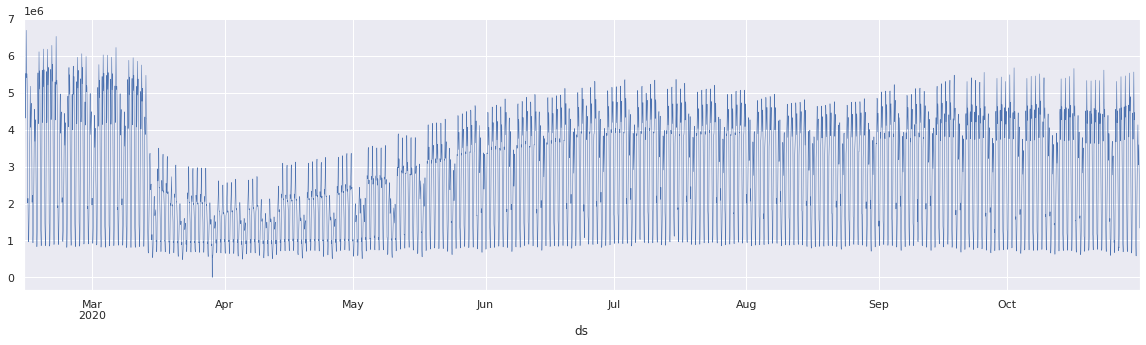

In [81]:
sbn.set(rc={'figure.figsize':(20,5)})
serie_o['viajes'].plot(linewidth=0.5)

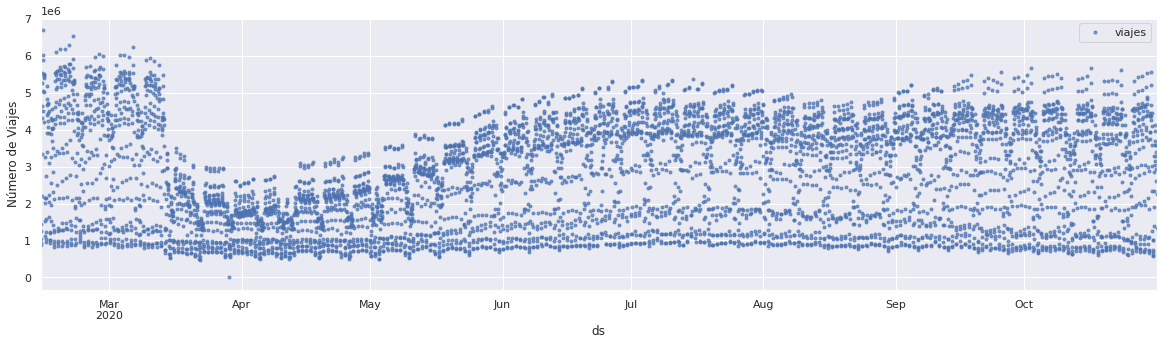

In [80]:
col_graf = ['viajes',] 
ejes = serie_o[col_graf].plot(marker='.', alpha=0.7, linestyle='None',figsize=(20,5),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de Viajes')

In [79]:
alt.data_transformers.disable_max_rows()
dom = ['0:00','1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
rng = ['FF5733', '33FFE8', '33D9FF', '338DFF', '5A33FF', 'B633FF', 'D433FF', 'FF33E9', '986693', '669879', 'B2BD38', 'EBEC03', 'EC7E05', '324C78', 'A1004B', '12ED08', '99A6A5', '0C0D0D', 'D7A0A6', '265A45', '3D4B03', 'A1772F' ,'760915', '58278C']

alt.Chart(serie_o.reset_index()).mark_point().encode(
    x = 'ds',
    y = 'viajes',
    
    #color=alt.Color('Hora', scale=alt.Scale(domain=dom,range=rng))
    color=alt.Color('Hora', scale=alt.Scale(scheme = 'dark2'))
).properties(width=700)

alt.Chart(...)

In [49]:
serie_o.index.freq = serie_o.index.inferred_freq
serieDia = serie_o.resample('24H').sum()
serieDia.index

DatetimeIndex(['2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='ds', length=261, freq='24H')

In [54]:
serieDia['Dia'] = serieDia.index.day_name()
serieDia.sample(8, random_state=0)      

,viajes,Año,Mes,Dia
ds,,,,
2020-07-29,8.036253e+07,48480,168,Wednesday
2020-05-30,6.099348e+07,48480,120,Saturday
2020-10-10,6.449195e+07,48480,240,Saturday
2020-04-30,4.843902e+07,48480,96,Thursday
2020-09-21,7.732197e+07,48480,216,Monday
2020-08-03,7.649003e+07,48480,192,Monday
2020-02-22,7.370577e+07,48480,48,Saturday
2020-04-25,3.352692e+07,48480,96,Saturday


<AxesSubplot:xlabel='ds'>

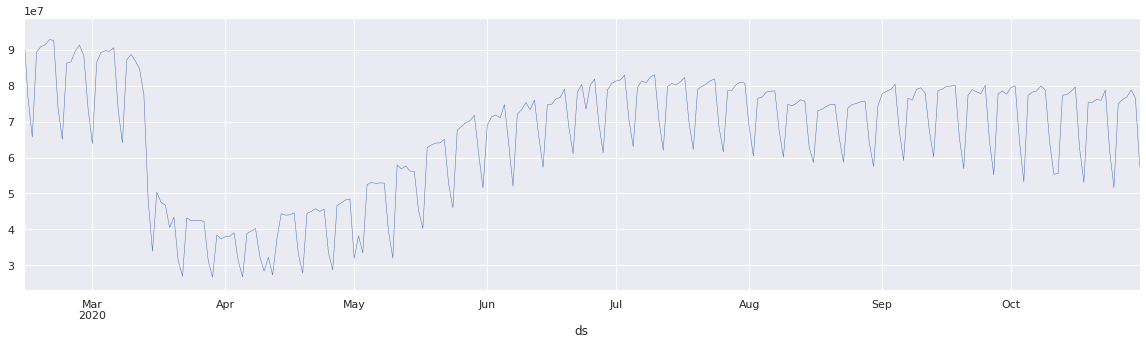

In [30]:
sbn.set(rc={'figure.figsize':(20,5)})
serieDia['viajes'].plot(linewidth=0.5)

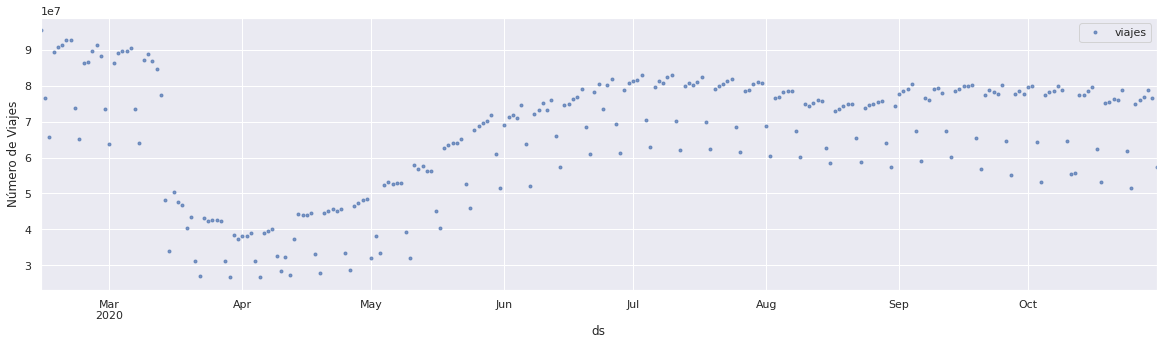

In [55]:
col_graf = ['viajes','Dia'] 
ejes = serieDia[col_graf].plot(marker='.', alpha=0.7, linestyle='None',figsize=(20,5),subplots=True)
for eje in ejes:
  eje.set_ylabel('Número de Viajes')

In [58]:
alt.Chart(serieDia.reset_index()).mark_point().encode(
    x = 'ds',
    y = 'viajes',
    
    color = 'Dia'
).properties(width=700)

alt.Chart(...)

Text(0, 0.5, 'Número de Viajes')

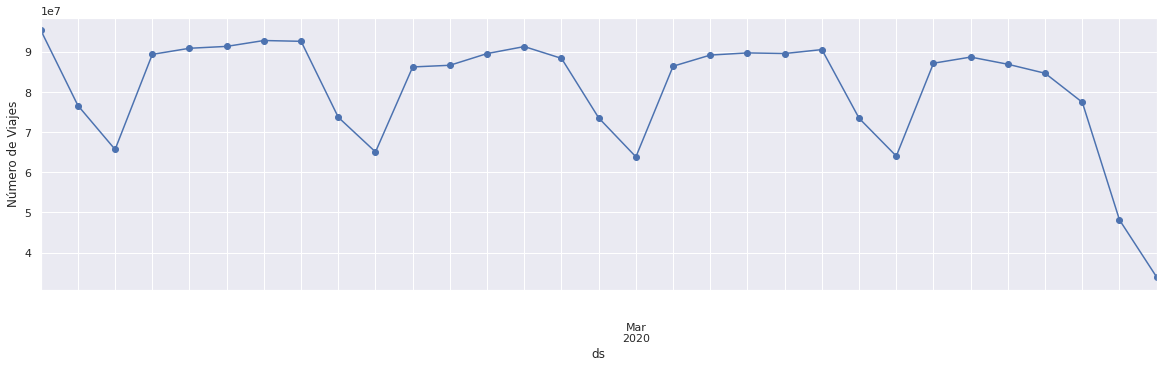

In [137]:
eje = serieDia.loc['2020-02-14':'2020-03-15', 'viajes'].plot(marker='o',linestyle='-',figsize=(20,5))
mplt.xticks(pd.date_range('2020-02-14','2020-03-15',freq='D'))
eje.set_ylabel('Número de Viajes')



Text(0, 0.5, 'Número de Viajes')

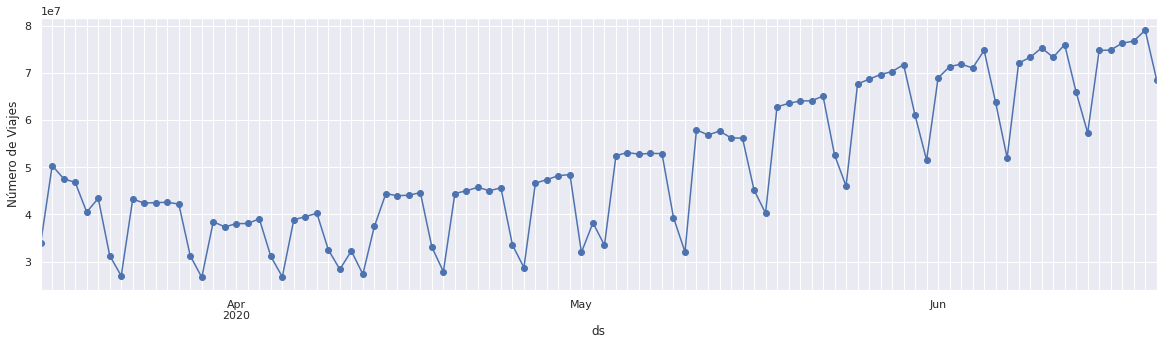

In [122]:
eje = serieDia.loc['2020-03-15':'2020-06-20', 'viajes'].plot(marker='o',linestyle='-',figsize=(20,5))
mplt.xticks(pd.date_range('2020-03-15','2020-06-20',freq='D') )
eje.set_ylabel('Número de Viajes')

Text(0, 0.5, 'Número de Viajes')

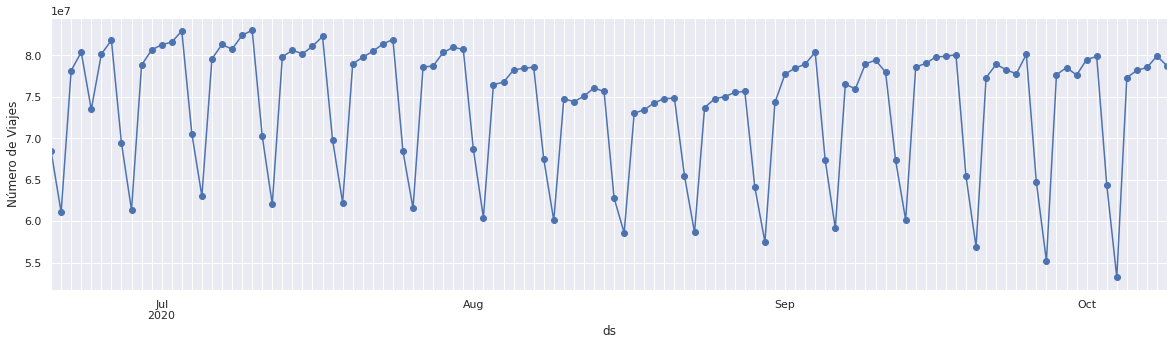

In [123]:
eje = serieDia.loc['2020-06-20':'2020-10-09', 'viajes'].plot(marker='o',linestyle='-',figsize=(20,5))
mplt.xticks(pd.date_range('2020-06-20','2020-10-09',freq='D') )
eje.set_ylabel('Número de Viajes')